# Genetic Progress EDA


Esse projeto tem como objetivo analisar a evolução genética de uma população de indivíduos ao longo de gerações. 

O dataset utilizado é o "genetic_progress.csv" que contém as seguintes colunas: 
generation,
id,
confidence_threshold,
max_cosine_distance,
scale_factor,
brightness,
contrast,
detection_proportion,
reid_precision,
unique_ids_across_folders,
fitness,
best_of_population,
Best_of_generations


In [75]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#carregando o dataset
df = pd.read_csv('genetic_progress.csv')
df.head()


,generation,id,confidence_threshold,max_cosine_distance,scale_factor,brightness,contrast,detection_proportion,reid_precision,unique_ids_across_folders,fitness,best_of_population,Best_of_generations
0,0,0,0.850023,0.226220,1.476015,27.245606,1.426349,0.885828,0.164372,1.0,0.680808,NaN,NaN
1,0,1,0.861673,0.389221,1.522400,32.814621,1.757351,0.895136,0.226667,1.0,0.705081,NaN,NaN
2,0,2,0.578505,0.375962,1.355972,5.830025,1.469743,0.885408,0.186786,1.0,0.687281,NaN,NaN
3,0,3,0.850023,0.226220,0.734455,-39.220070,1.388628,0.893785,0.245000,1.0,0.709771,NaN,NaN
4,0,4,0.850023,0.226220,1.476015,-39.220070,0.871455,0.893689,0.218571,1.0,0.701785,NaN,NaN


In [76]:
#informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   generation                 200 non-null    int64  
 1   id                         200 non-null    int64  
 2   confidence_threshold       200 non-null    float64
 3   max_cosine_distance        200 non-null    float64
 4   scale_factor               200 non-null    float64
 5   brightness                 200 non-null    float64
 6   contrast                   200 non-null    float64
 7   detection_proportion       200 non-null    float64
 8   reid_precision             200 non-null    float64
 9   unique_ids_across_folders  200 non-null    float64
 10  fitness                    200 non-null    float64
 11  best_of_population         13 non-null     object 
 12  Best_of_generations        2 non-null      object 
dtypes: float64(9), int64(2), object(2)
memory usage: 2

# Análise Exploratória de Dados

In [77]:
#estatísticas descritivas
df.describe()


,generation,id,confidence_threshold,max_cosine_distance,scale_factor,brightness,contrast,detection_proportion,reid_precision,unique_ids_across_folders,fitness
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000
mean,4.500000,51.375000,0.839455,0.378354,1.645471,28.607588,1.480991,0.900853,0.249139,1.0,0.715253
std,2.879489,25.593937,0.073052,0.037321,0.326501,15.852334,0.159077,0.009262,0.017078,0.0,0.008893
min,0.000000,0.000000,0.557395,0.226220,0.593356,-39.220070,0.871455,0.840505,0.151115,1.0,0.676415
25%,2.000000,26.750000,0.861673,0.389221,1.522400,32.814621,1.426349,0.900450,0.248333,1.0,0.715320
50%,4.500000,64.500000,0.861673,0.389221,1.522400,32.814621,1.426349,0.903779,0.256667,1.0,0.719267
75%,7.000000,70.000000,0.861673,0.389221,1.938487,32.814621,1.469743,0.905535,0.256667,1.0,0.719821
max,9.000000,88.000000,0.900000,0.400000,1.938487,50.000000,1.757351,0.908382,0.262619,1.0,0.722019


In [78]:
#verificando valores nulos
df.isnull().sum()

generation                     0
id                             0
confidence_threshold           0
max_cosine_distance            0
scale_factor                   0
brightness                     0
contrast                       0
detection_proportion           0
reid_precision                 0
unique_ids_across_folders      0
fitness                        0
best_of_population           187
Best_of_generations          198
dtype: int64

In [79]:
#tratando valores nulos, adicionar 0 nos valores nulos
df.fillna(0, inplace=True)

#substituindo Valores BG e BP nas colunas   best_of_population  Best_of_generations por 1
df['best_of_population'] = df['best_of_population'].replace('BP', 1)
df['Best_of_generations'] = df['best_of_population'].replace('BG', 1)



/var/folders/fn/s597phxd3cz8z9r7fndp350m0000gn/T/ipykernel_46388/199663080.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['best_of_population'] = df['best_of_population'].replace('BP', 1)


In [80]:
#verificando valores únicos
df.nunique()


generation                   10
id                           89
confidence_threshold         13
max_cosine_distance           9
scale_factor                 18
brightness                   15
contrast                     20
detection_proportion         67
reid_precision               37
unique_ids_across_folders     1
fitness                      79
best_of_population            2
Best_of_generations           2
dtype: int64

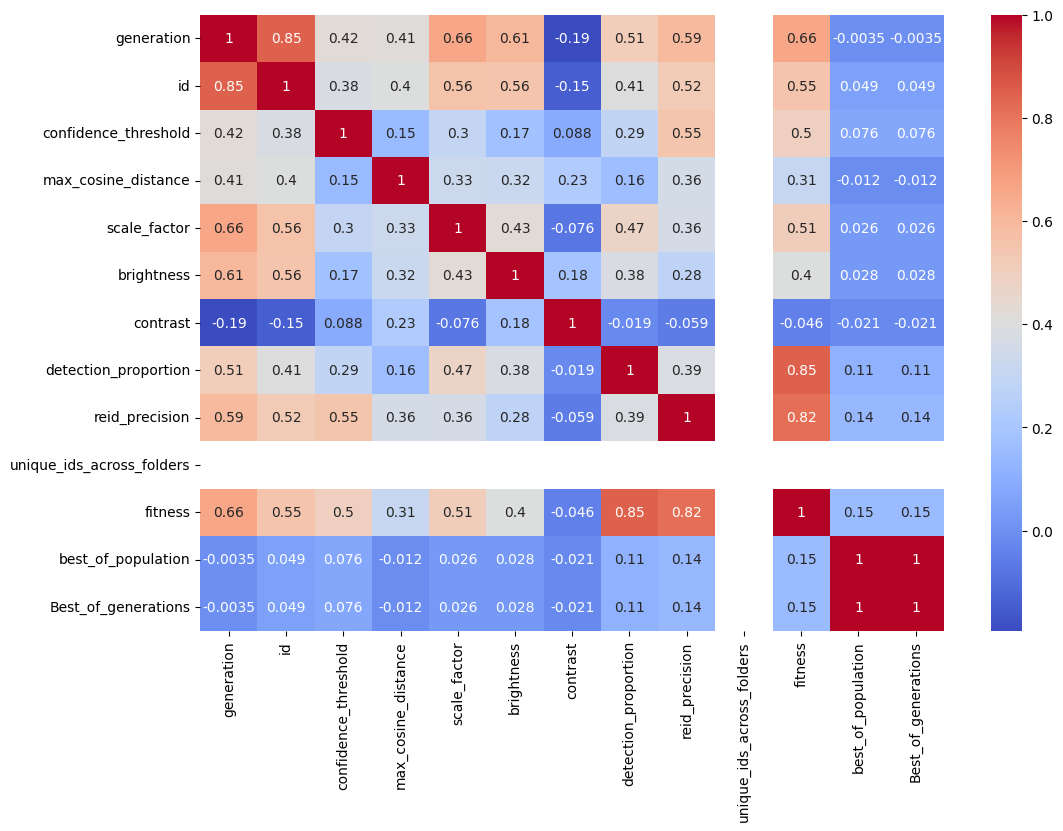

In [81]:
#verificando a correlação entre as variáveis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


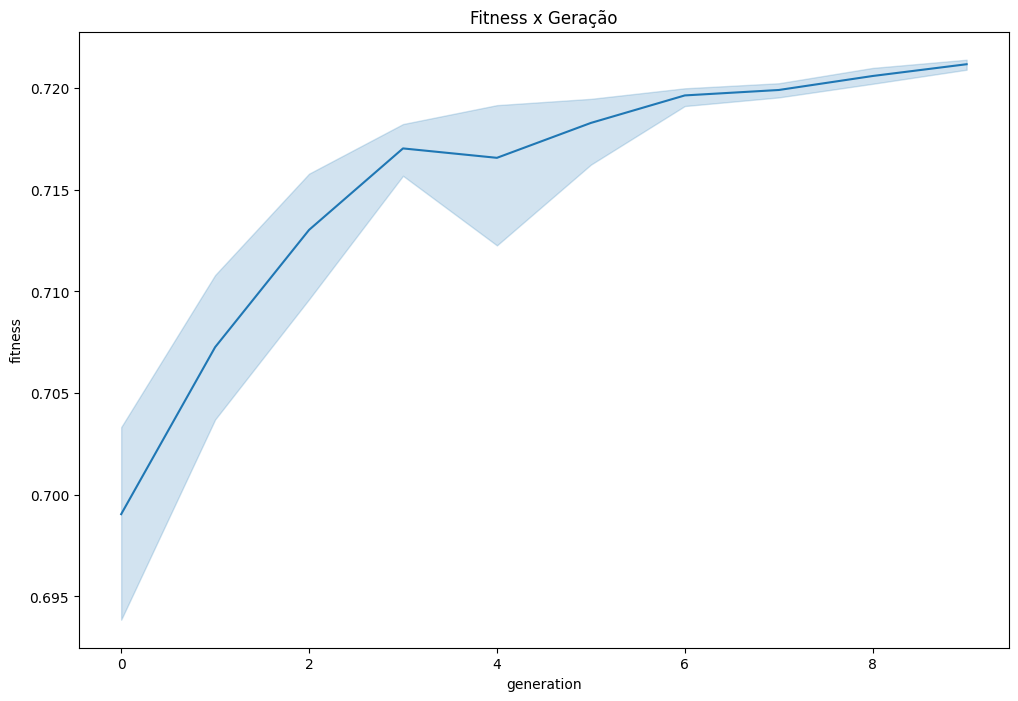

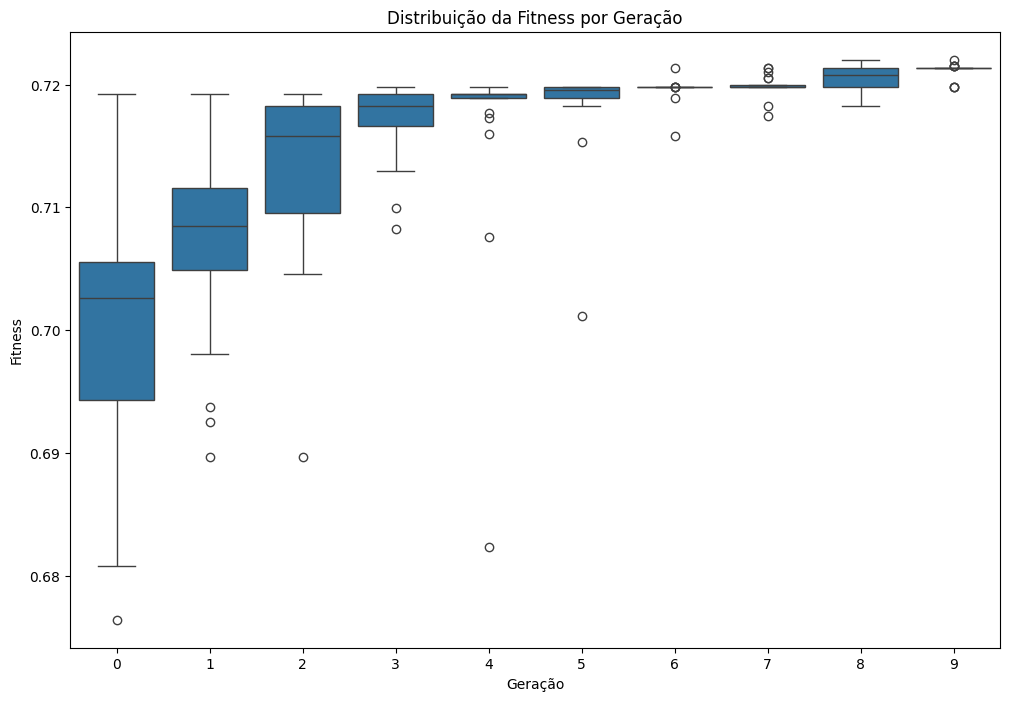

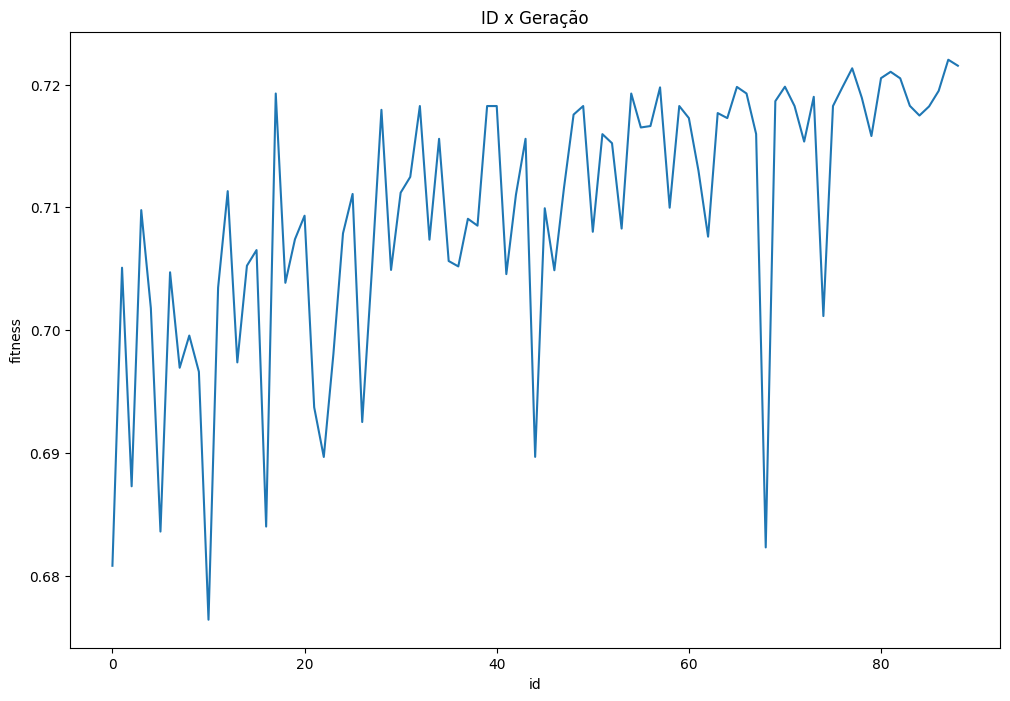

In [82]:
#plotando a variavel fitness
plt.figure(figsize=(12,8))
sns.lineplot(x='generation', y='fitness', data=df)
plt.title('Fitness x Geração')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='generation', y='fitness')
plt.title('Distribuição da Fitness por Geração')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.show()

plt.figure(figsize=(12,8))
sns.lineplot(x='id', y='fitness', data=df)
plt.title('ID x Geração')
plt.show()




In [83]:
#Encontrando o melhor individuo
df[df['fitness'] == df['fitness'].max()]


,generation,id,confidence_threshold,max_cosine_distance,scale_factor,brightness,contrast,detection_proportion,reid_precision,unique_ids_across_folders,fitness,best_of_population,Best_of_generations
171,8,87,0.858776,0.389221,1.932214,32.814621,1.426349,0.906698,0.26,1.0,0.722019,1,1
181,9,87,0.858776,0.389221,1.932214,32.814621,1.426349,0.906698,0.26,1.0,0.722019,1,1


In [84]:
#Encontrando o melhor detecção
df[df['detection_proportion'] == df['detection_proportion'].max()]

,generation,id,confidence_threshold,max_cosine_distance,scale_factor,brightness,contrast,detection_proportion,reid_precision,unique_ids_across_folders,fitness,best_of_population,Best_of_generations
175,8,88,0.861673,0.389221,1.938487,50.0,1.426349,0.908382,0.255,1.0,0.721529,0,0
180,9,88,0.861673,0.389221,1.938487,50.0,1.426349,0.908382,0.255,1.0,0.721529,0,0
189,9,88,0.861673,0.389221,1.938487,50.0,1.426349,0.908382,0.255,1.0,0.721529,0,0
191,9,88,0.861673,0.389221,1.938487,50.0,1.426349,0.908382,0.255,1.0,0.721529,0,0
198,9,88,0.861673,0.389221,1.938487,50.0,1.426349,0.908382,0.255,1.0,0.721529,0,0


In [85]:
#Encontrando o melhor reid_precision
df[df['reid_precision'] == df['reid_precision'].max()]

,generation,id,confidence_threshold,max_cosine_distance,scale_factor,brightness,contrast,detection_proportion,reid_precision,unique_ids_across_folders,fitness,best_of_population,Best_of_generations
25,1,23,0.861673,0.389221,1.5224,5.830025,1.469743,0.865438,0.262619,1.0,0.698048,0,0


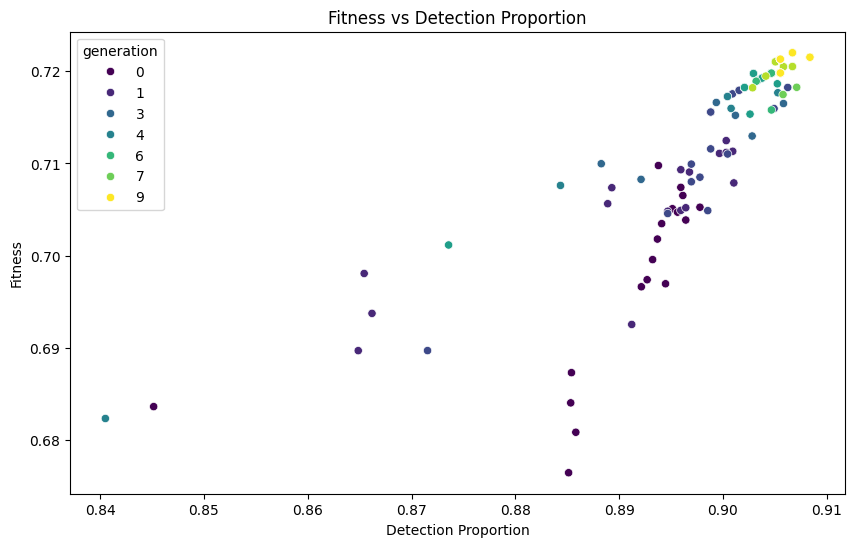

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='detection_proportion', y='fitness', hue='generation', palette='viridis')
plt.title('Fitness vs Detection Proportion')
plt.xlabel('Detection Proportion')
plt.ylabel('Fitness')
plt.show()

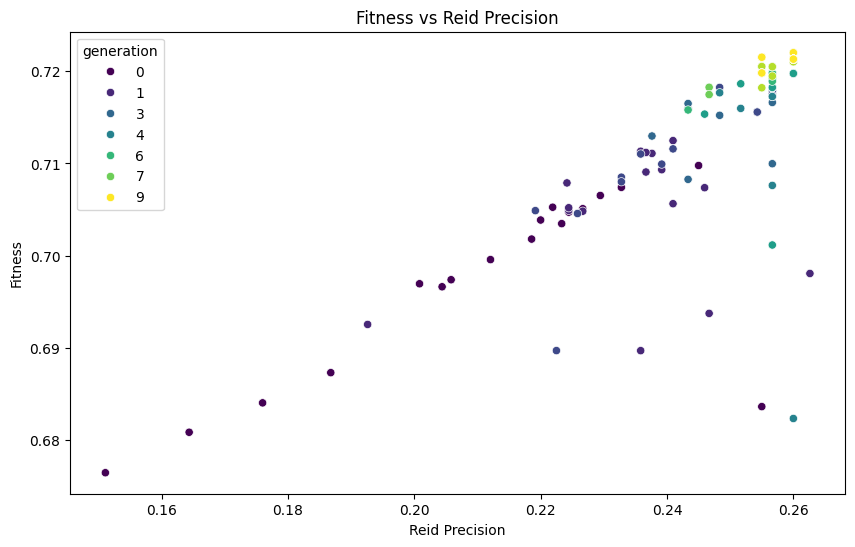

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reid_precision', y='fitness', hue='generation', palette='viridis')
plt.title('Fitness vs Reid Precision')
plt.xlabel('Reid Precision')
plt.ylabel('Fitness')
plt.show()

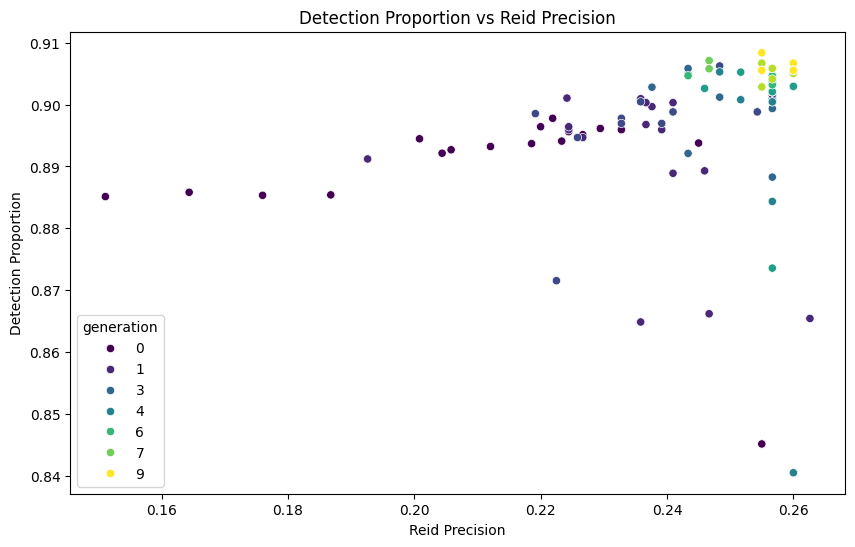

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reid_precision', y='detection_proportion', hue='generation', palette='viridis')
plt.title('Detection Proportion vs Reid Precision')
plt.xlabel('Reid Precision')
plt.ylabel('Detection Proportion')
plt.show()


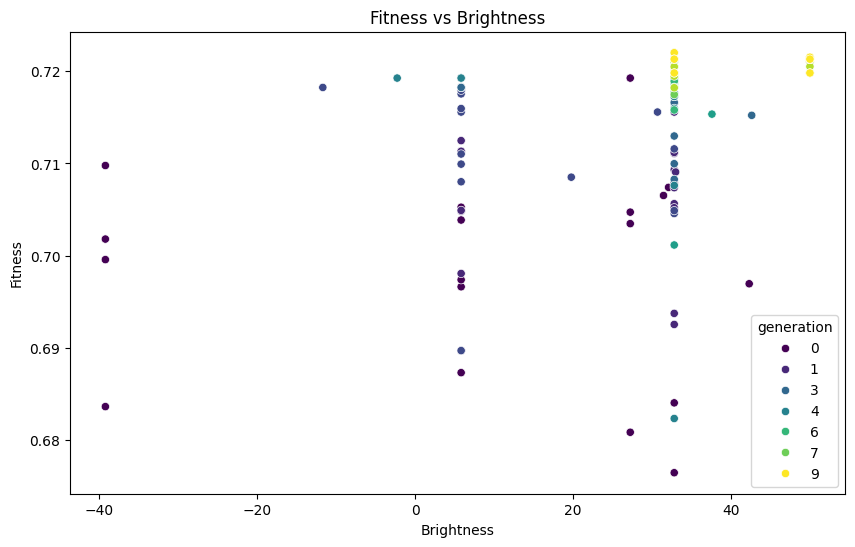

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='brightness', y='fitness', hue='generation', palette='viridis')
plt.title('Fitness vs Brightness')
plt.xlabel('Brightness')
plt.ylabel('Fitness')
plt.show()

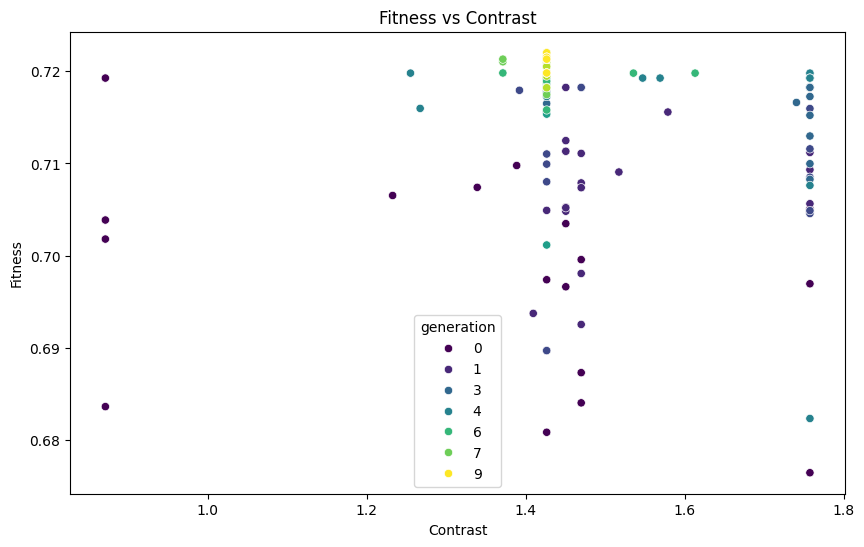

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='contrast', y='fitness', hue='generation', palette='viridis')
plt.title('Fitness vs Contrast')
plt.xlabel('Contrast')
plt.ylabel('Fitness')
plt.show()

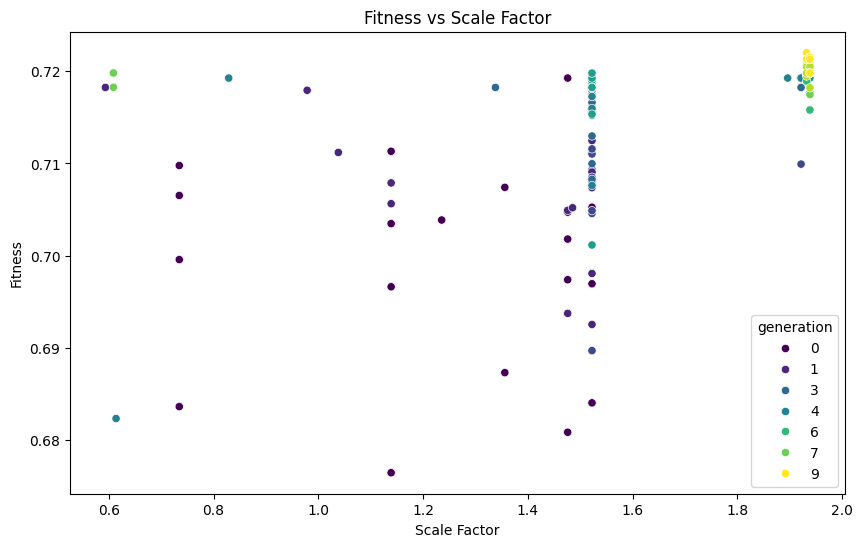

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='scale_factor', y='fitness', hue='generation', palette='viridis')
plt.title('Fitness vs Scale Factor')
plt.xlabel('Scale Factor')
plt.ylabel('Fitness')
plt.show()

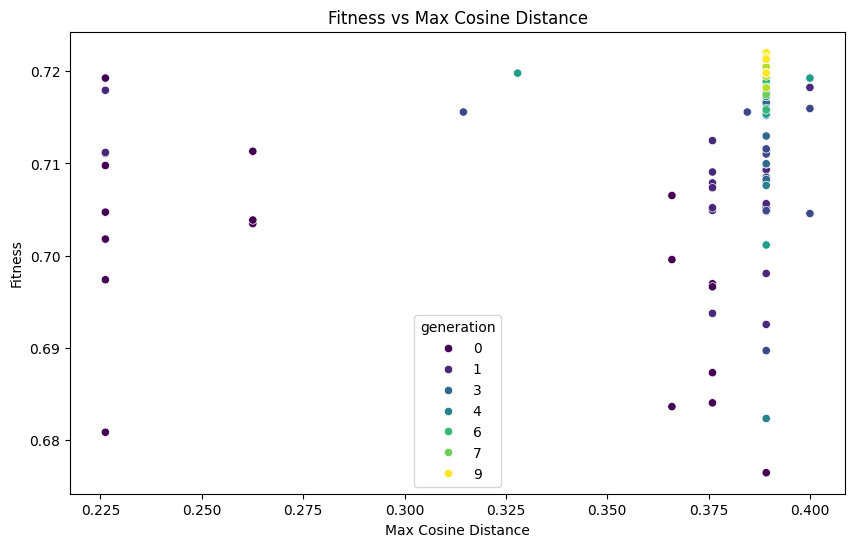

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='max_cosine_distance', y='fitness', hue='generation', palette='viridis')
plt.title('Fitness vs Max Cosine Distance')
plt.xlabel('Max Cosine Distance')
plt.ylabel('Fitness')
plt.show()

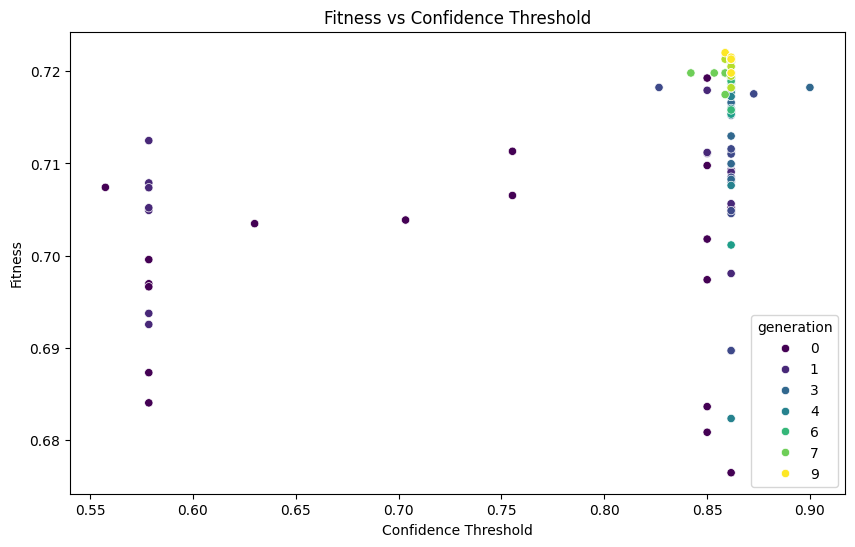

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='confidence_threshold', y='fitness', hue='generation', palette='viridis')
plt.title('Fitness vs Confidence Threshold')
plt.xlabel('Confidence Threshold')
plt.ylabel('Fitness')
plt.show()

In [94]:
data = pd.read_csv('detailed_results.csv')
data.head()

,folder,id,generation,fitness,detection_proportion,reid_precision,confidence_threshold,max_cosine_distance,scale_factor,brightness,contrast
0,Person10,1,0,0.698983,0.898305,0.200000,0.5,0.2,1.0,1.0,1.0
1,Person5,1,0,0.681119,0.923077,0.090909,0.5,0.2,1.0,1.0,1.0
2,Person2,1,0,0.676923,0.890110,0.142857,0.5,0.2,1.0,1.0,1.0
3,Person3,1,0,0.646192,0.864865,0.090909,0.5,0.2,1.0,1.0,1.0
4,Person4,1,0,0.680769,0.884615,0.166667,0.5,0.2,1.0,1.0,1.0


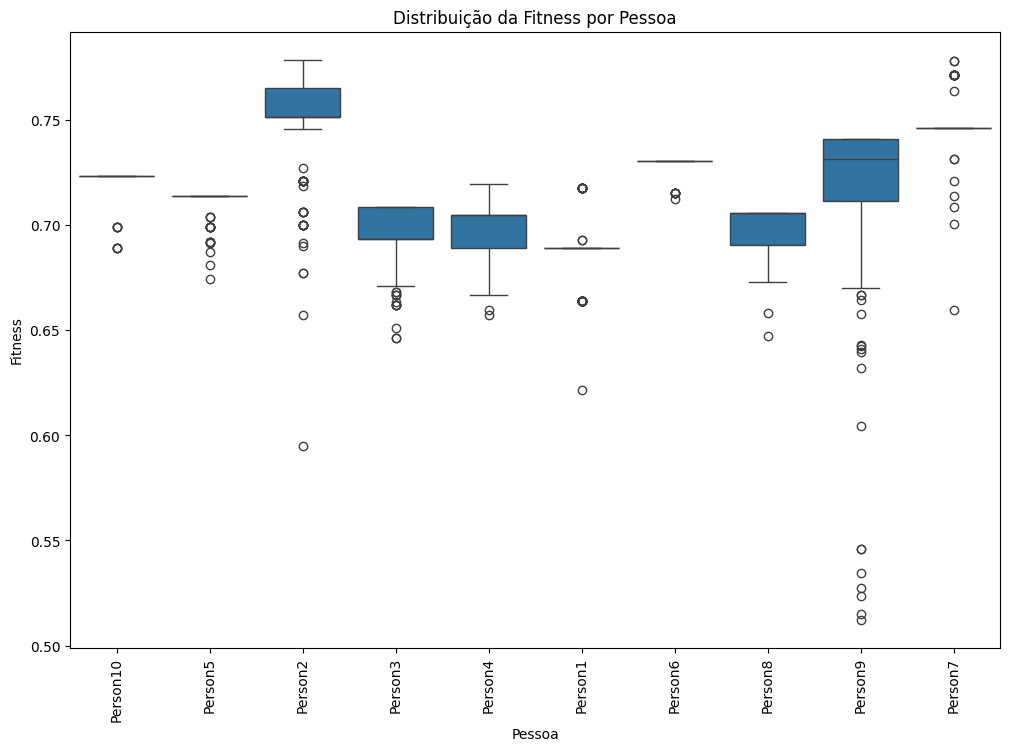

In [95]:
# Distribuição de Métricas por Pessoa
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='folder', y='fitness')
plt.title('Distribuição da Fitness por Pessoa')
plt.xlabel('Pessoa')
plt.ylabel('Fitness')
plt.xticks(rotation=90)
plt.show()

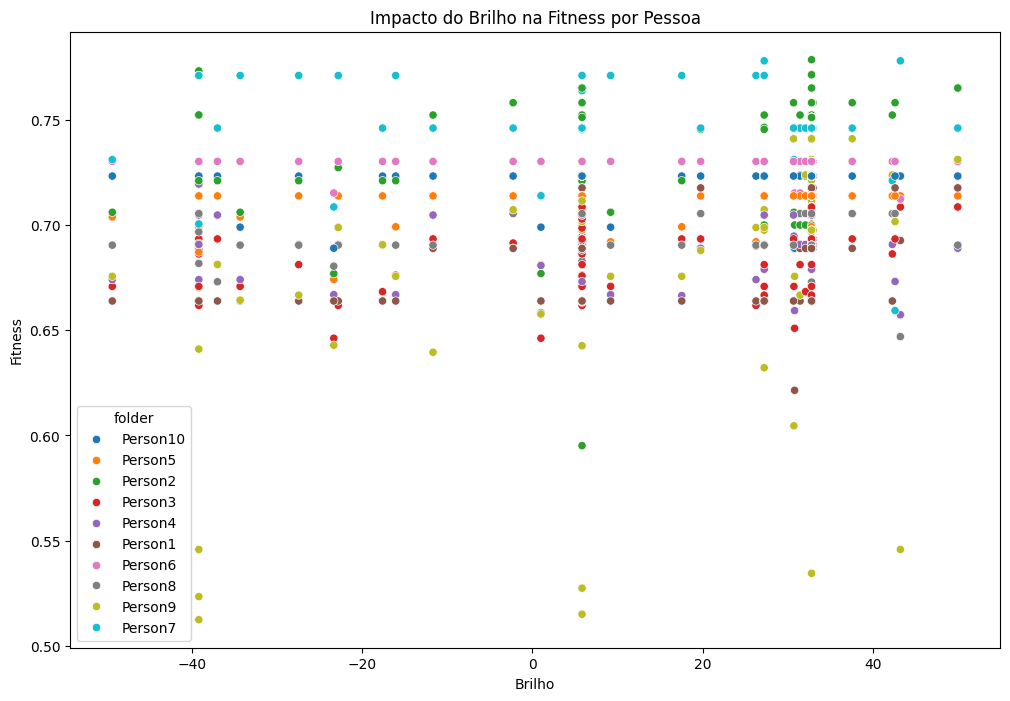

In [96]:
# Impacto dos Parâmetros nos Resultados Individuais
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='brightness', y='fitness', hue='folder', palette='tab10')
plt.title('Impacto do Brilho na Fitness por Pessoa')
plt.xlabel('Brilho')
plt.ylabel('Fitness')
plt.show()

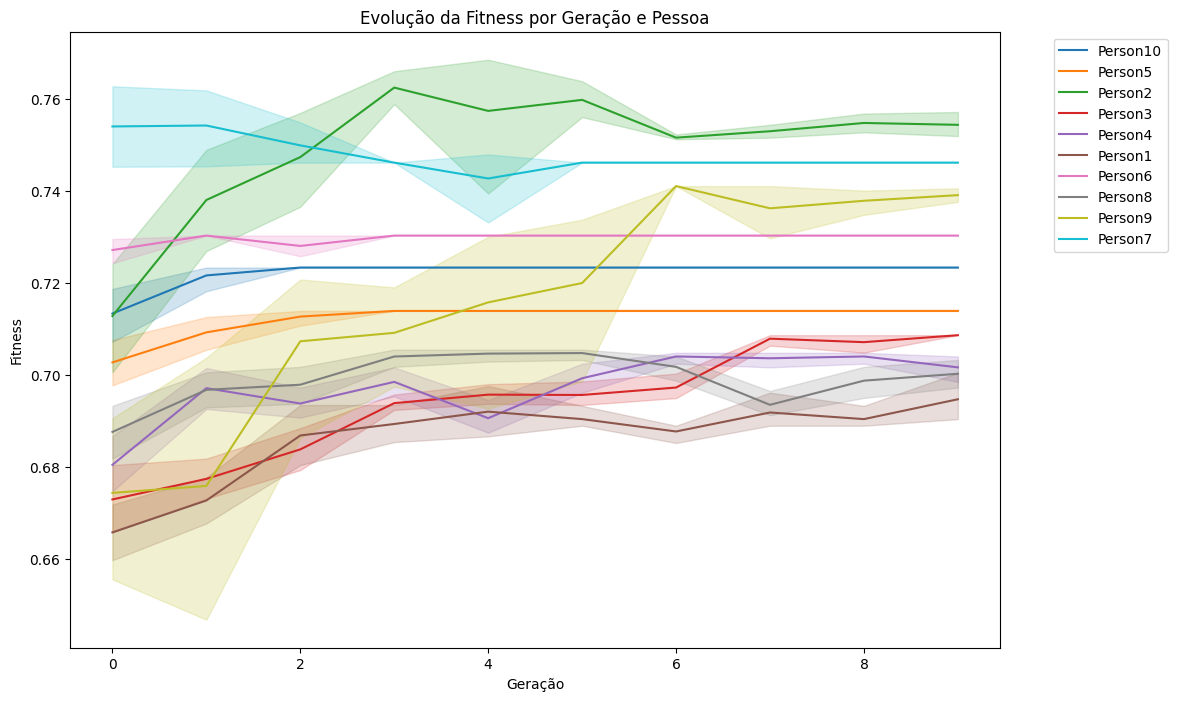

In [97]:
# Comparação de Gerações
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='generation', y='fitness', hue='folder', palette='tab10')
plt.title('Evolução da Fitness por Geração e Pessoa')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

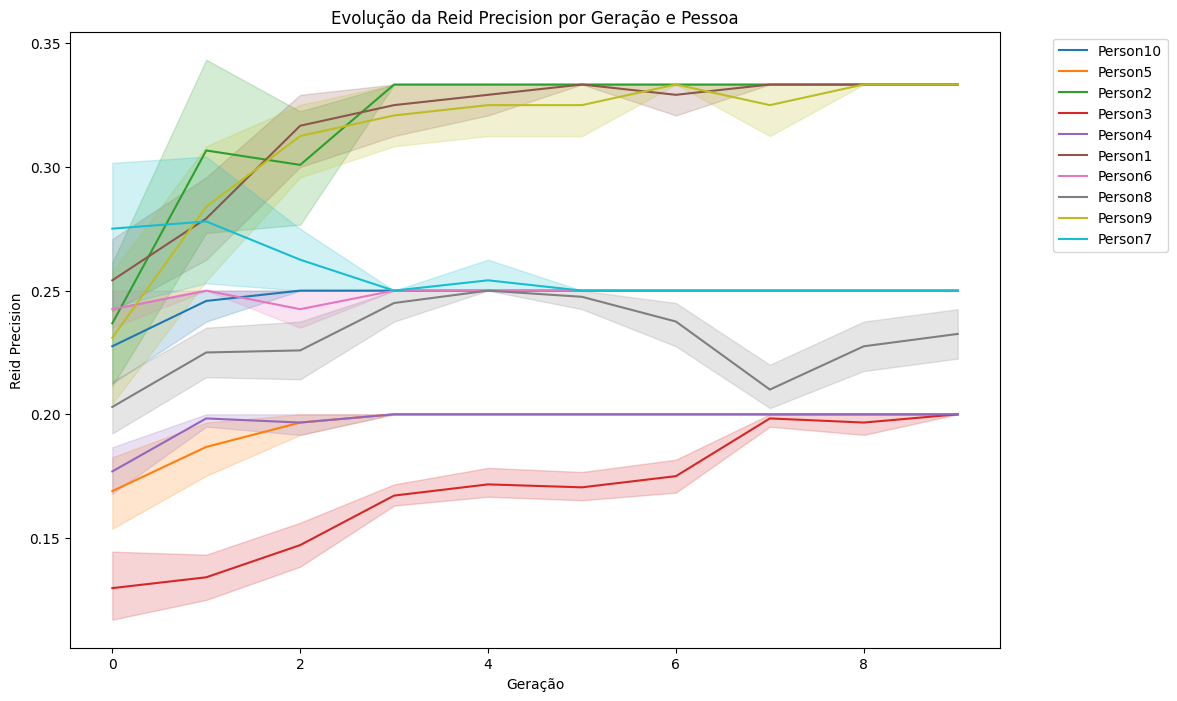

In [98]:
# Comparação de Gerações
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='generation', y='reid_precision', hue='folder', palette='tab10')
plt.title('Evolução da Reid Precision por Geração e Pessoa')
plt.xlabel('Geração')
plt.ylabel('Reid Precision')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


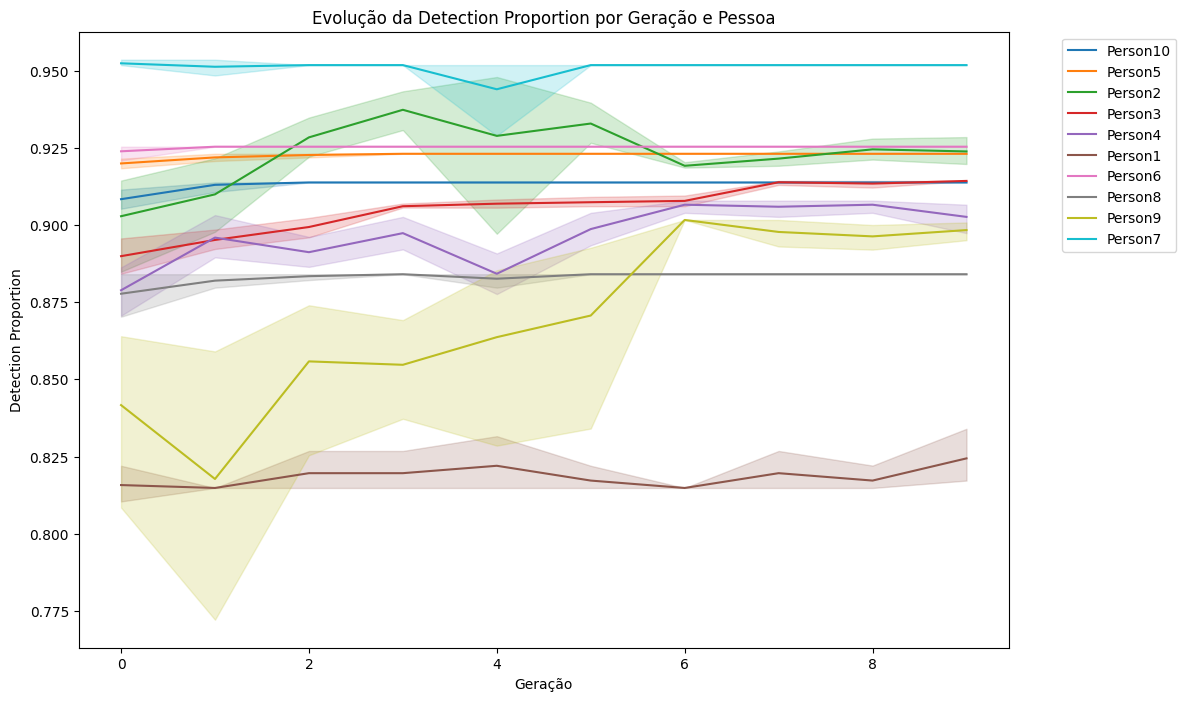

In [99]:
# Comparação de Gerações
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='generation', y='detection_proportion', hue='folder', palette='tab10')
plt.title('Evolução da Detection Proportion por Geração e Pessoa')
plt.xlabel('Geração')
plt.ylabel('Detection Proportion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

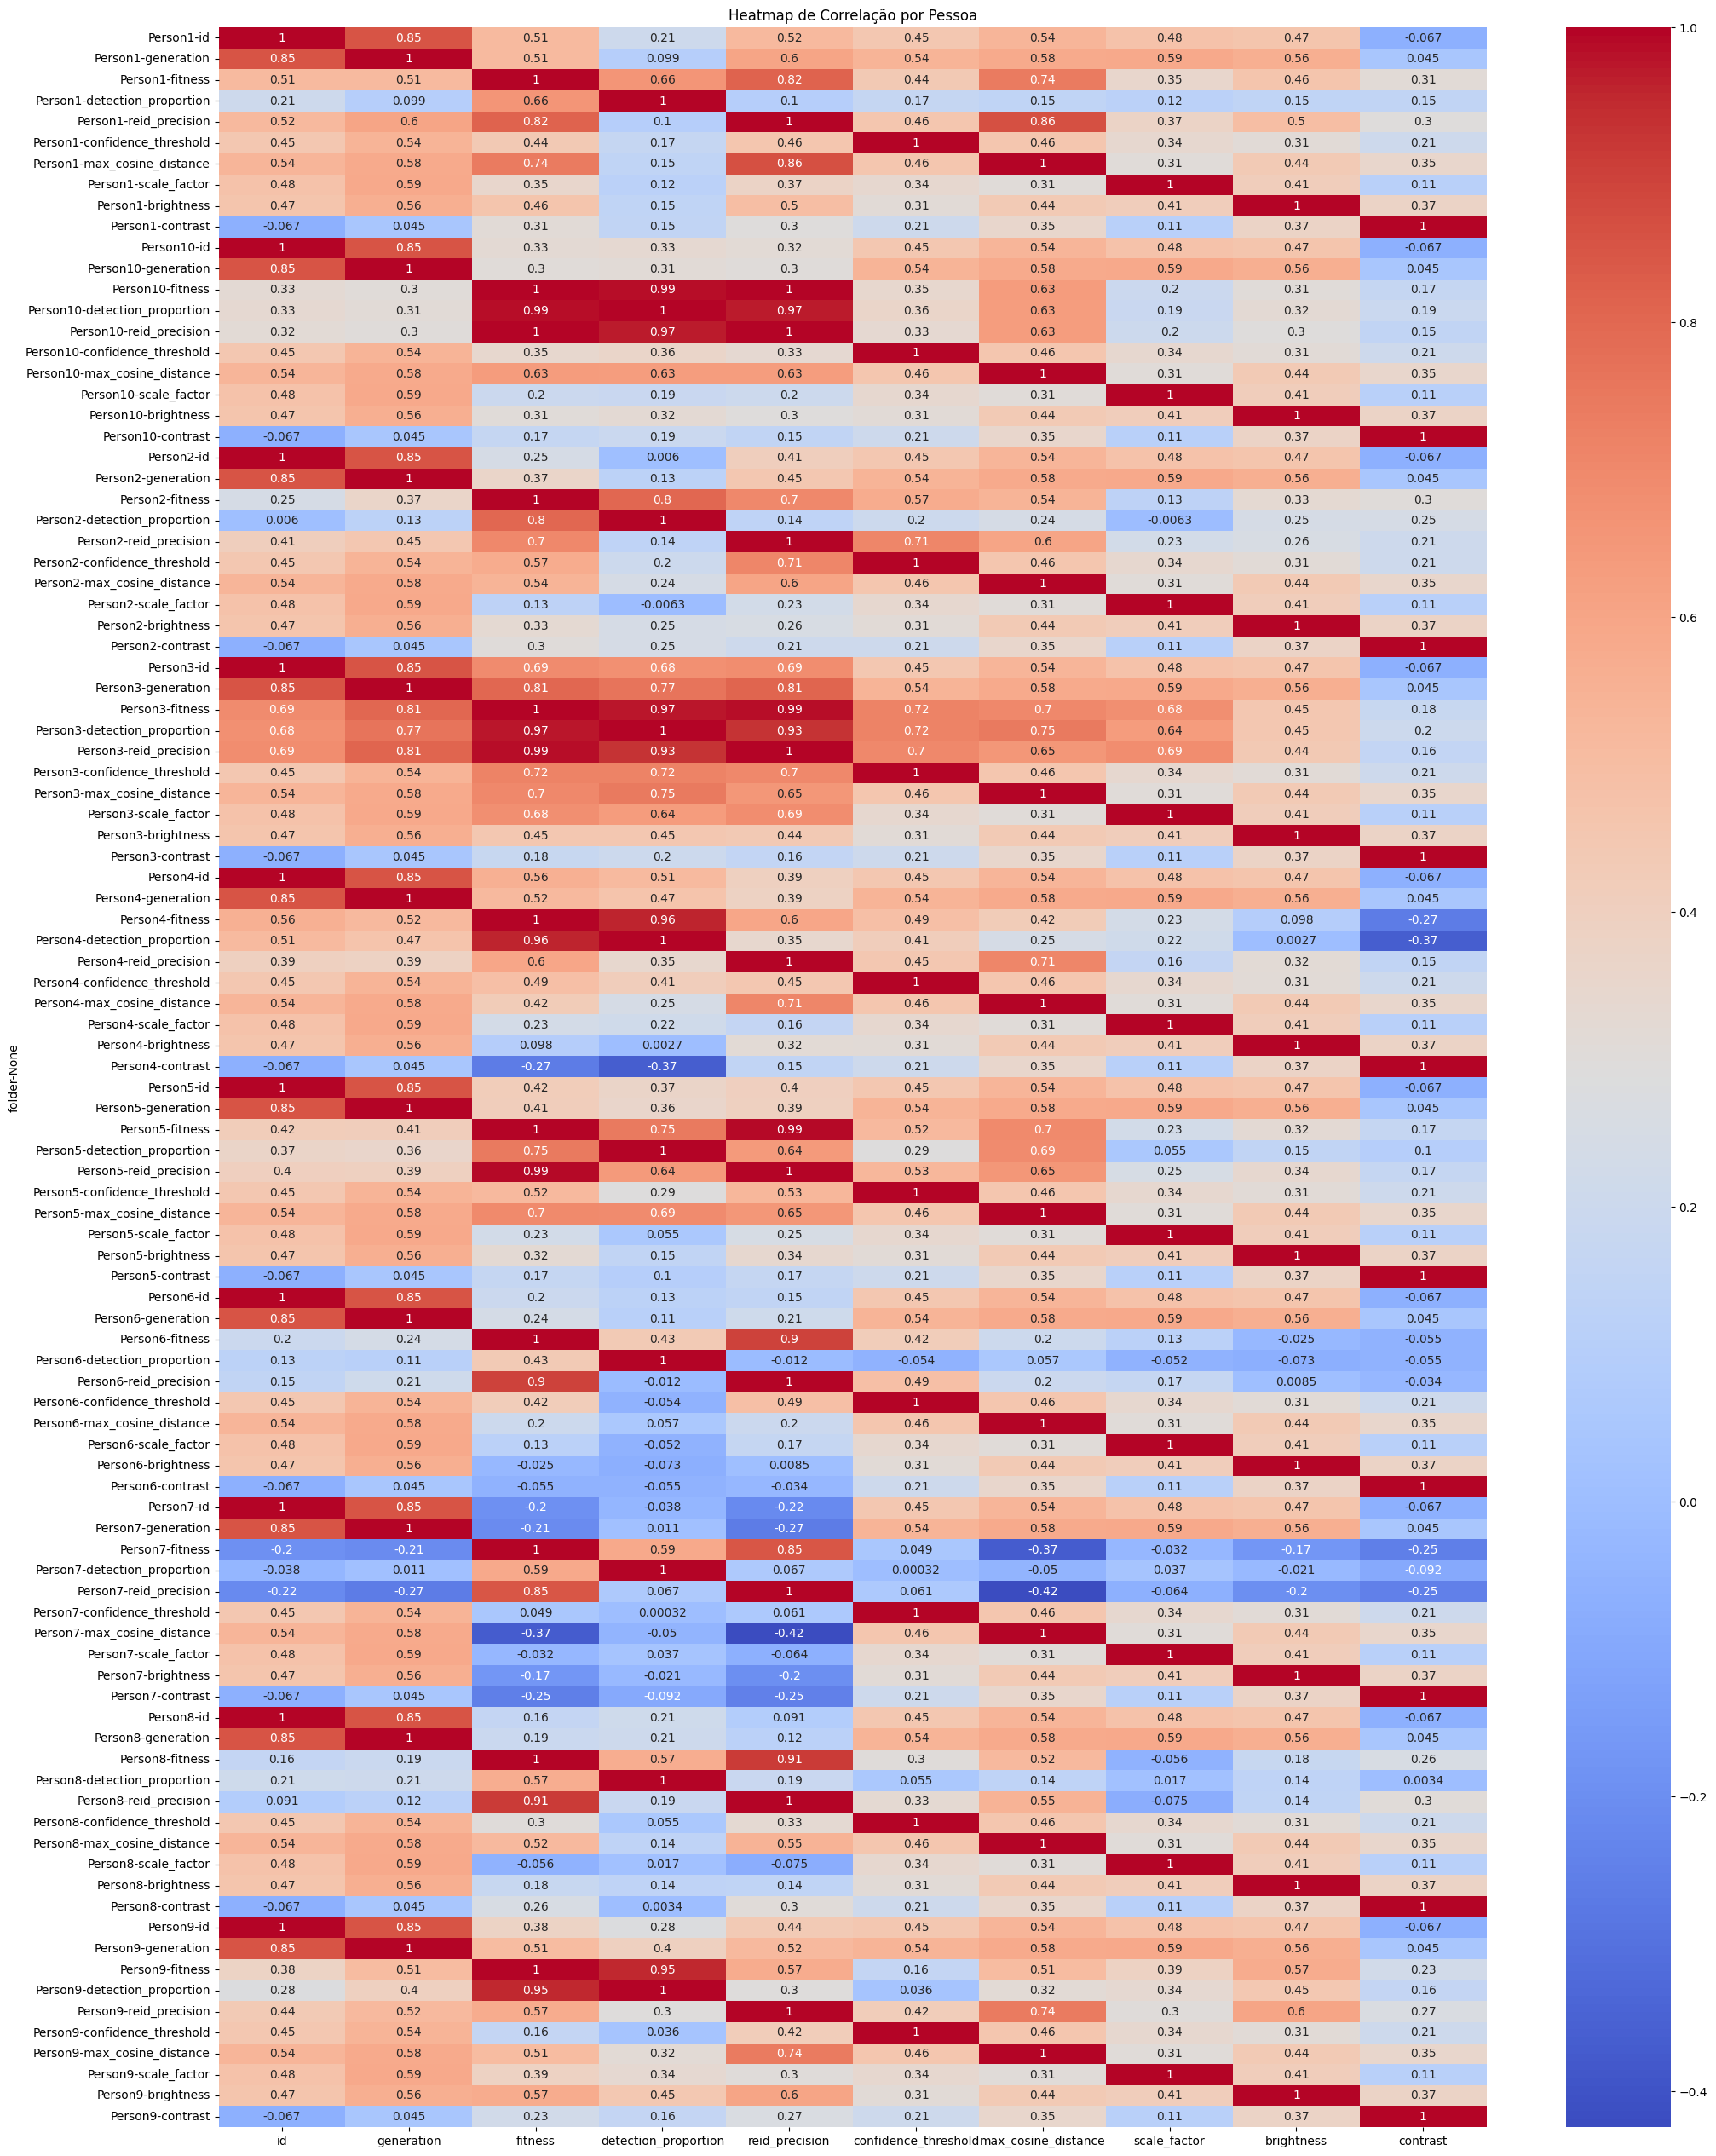

In [100]:
# Análise de Correlação por Pessoa
correlation_matrix = data.groupby('folder').corr()
plt.figure(figsize=(24, 32))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação por Pessoa')
plt.show()

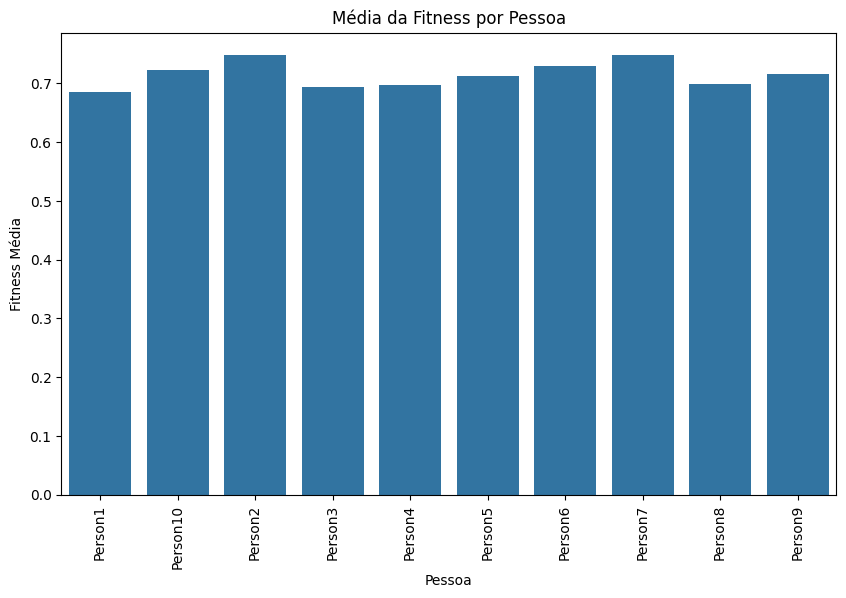

In [101]:
# Calculate the mean fitness for each person
fitness_by_person = data.pivot_table(index='folder', values='fitness', aggfunc='mean')

# Plotting the mean fitness for each person without using 'hue' to avoid the error
plt.figure(figsize=(10, 6))
sns.barplot(x=fitness_by_person.index, y=fitness_by_person['fitness'])
plt.title('Média da Fitness por Pessoa')
plt.xlabel('Pessoa')
plt.ylabel('Fitness Média')
plt.xticks(rotation=90)
plt.show()

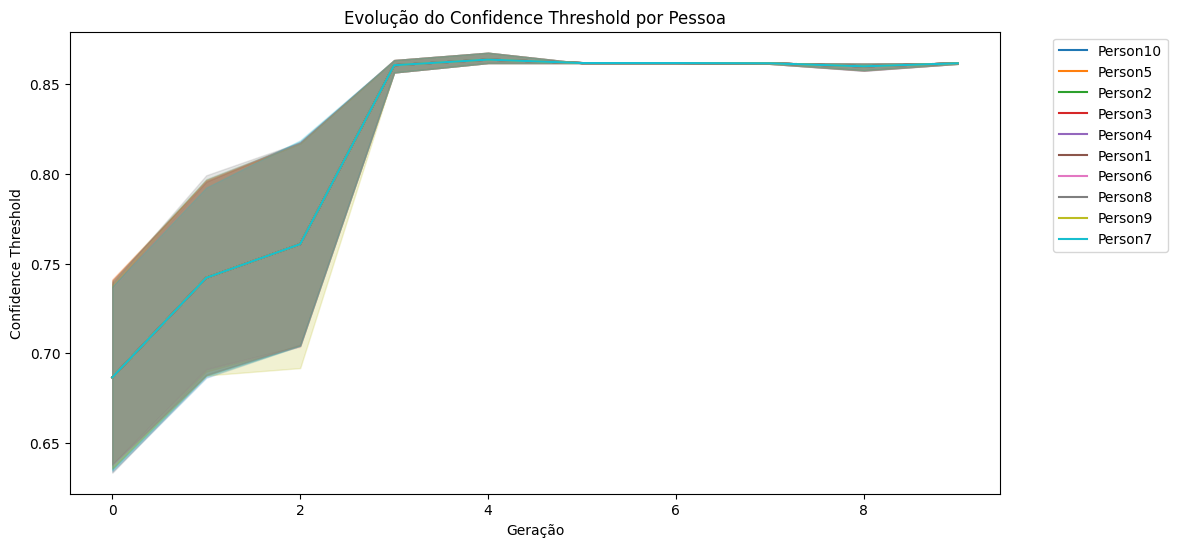

In [102]:
## Análise da evolução dos parâmetros ao longo das gerações
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='generation', y='confidence_threshold', hue='folder')
plt.title('Evolução do Confidence Threshold por Pessoa')
plt.xlabel('Geração')
plt.ylabel('Confidence Threshold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

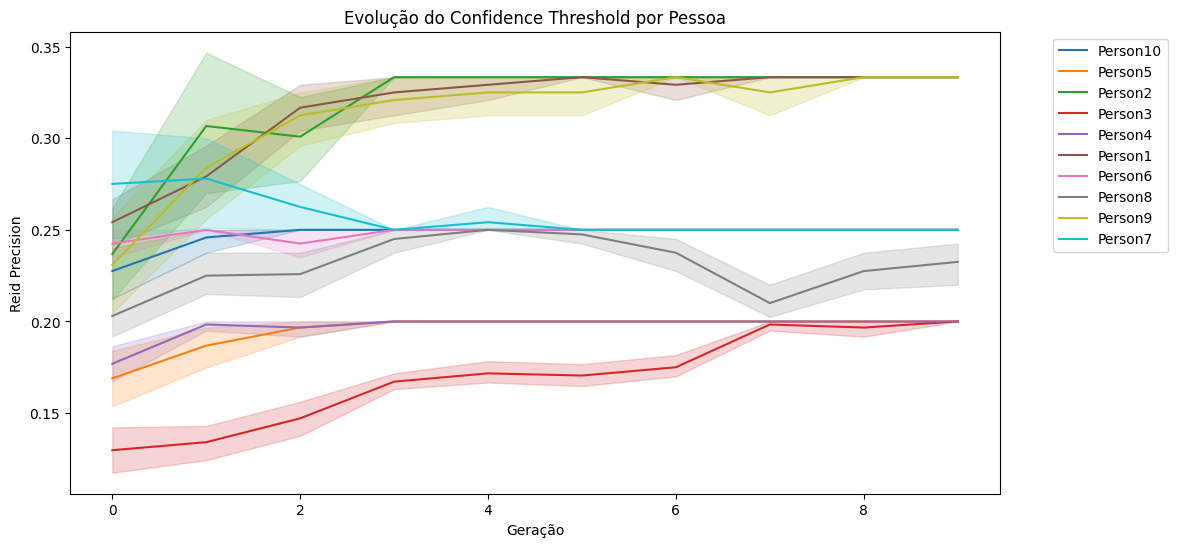

In [106]:
## Análise da evolução dos parâmetros ao longo das gerações
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='generation', y='reid_precision', hue='folder')
plt.title('Evolução do Confidence Threshold por Pessoa')
plt.xlabel('Geração')
plt.ylabel('Reid Precision')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()